In [3]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Preprocessing**

In [5]:
#load the data

data = pd.read_csv('/content/diabetes.csv')

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases and is shared by Kaggle. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.

**Descriptive Analysis**

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The dataset has 768 rows and 8 features with the following columns:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skinfold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml), Insulin level in blood

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: Age (years)

Outcome: Class variable, Wheather Diabetes is present or Not (0 -> No or 1 -> Yes)

**Descriptive Statistics**

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Convert columns to correct DataType**

In [7]:
data['Pregnancies'] = data['Pregnancies'].astype(float)
data['Glucose'] = data['Glucose'].astype(float)
data['BloodPressure'] = data['BloodPressure'].astype(float)
data['SkinThickness'] = data['SkinThickness'].astype(float)
data['Insulin'] = data['Insulin'].astype(float)
data['BMI'] = data['BMI'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


**Missing Values Interpretation**

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in this dataset. However, it's important to note that certain columns might have zero values, which could be considered as missing data in the context of medical measurements (e.g., Glucose, BloodPressure, SkinThickness, Insulin, and BMI should not have zero values in a practical scenario).

**Handle missing data in the numerical columns which cannot contain '0' as value with the mean of the column**

In [9]:
mean_glucose = data.loc[:, 'Glucose'].mean()
mean_bloodpressure = data.loc[:, 'BloodPressure'].mean()
mean_skinthickness = data.loc[:, 'SkinThickness'].mean()
mean_insulin = data.loc[:, 'Insulin'].mean()
mean_bmi = data.loc[:, 'BMI'].mean()

data.loc[:, 'Glucose'] = data.loc[:, 'Glucose'].replace(0, mean_glucose)
data.loc[:, 'BloodPressure'] = data.loc[:, 'BloodPressure'].replace(0, mean_bloodpressure)
data.loc[:, 'SkinThickness'] = data.loc[:, 'SkinThickness'].replace(0, mean_skinthickness)
data.loc[:, 'Insulin'] = data.loc[:, 'Insulin'].replace(0, mean_insulin)
data.loc[:, 'BMI'] = data.loc[:, 'BMI'].replace(0, mean_bmi)

data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


**Summary Statistics**

In [ ]:
summary_stats = data.describe(include='all')
summary_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Interpretation of Summary Statistics**

The summary statistics provide an overview of the dataset, showing count, mean, standard deviation, and the 25th, 50th, and 75th percentiles for each feature.

Pregnancies:
Mean: 3.85 pregnancies
Range: 0 to 17 pregnancies
Standard deviation: 3.37 pregnancies

Glucose:
Mean: 121.69 mg/dL
Range: 44 to 199 mg/dL
Standard deviation: 30.54 mg/dL

BloodPressure:
Mean: 72.41 mm Hg
Range: 24 to 122 mm Hg
Standard deviation: 12.38 mm Hg

SkinThickness:
Mean: 29.15 mm
Range: 7 to 99 mm
Standard deviation: 10.48 mm

Insulin:
Mean: 155.55 mu U/ml
Range: 14 to 846 mu U/ml
Standard deviation: 118.78 mu U/ml

BMI:
Mean: 32.46 kg/m²
Range: 18.2 to 67.1 kg/m²
Standard deviation: 6.92 kg/m²

DiabetesPedigreeFunction:
Mean: 0.47
Range: 0.078 to 2.42
Standard deviation: 0.33

Age:
Mean: 33.24 years
Range: 21 to 81 years
Standard deviation: 11.76 years

Outcome: Mean: 0.35 (approximately 35% of the participants have diabetes)

**Visualize Distributions**

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231

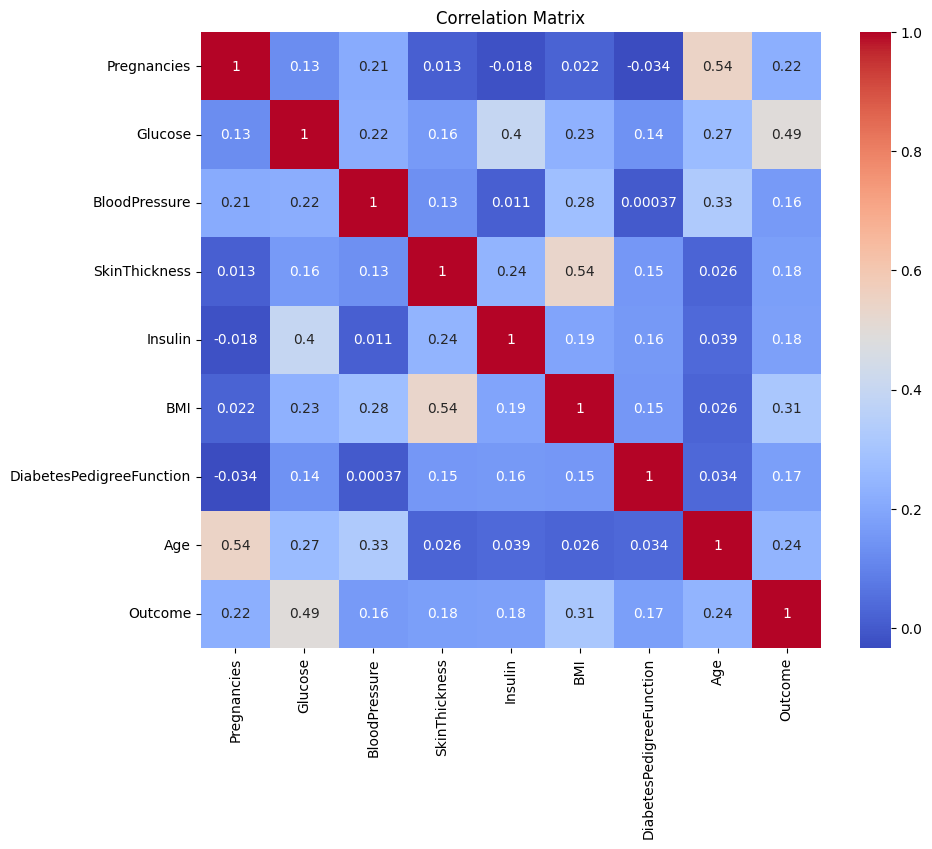

In [15]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Interpretation from Correlation Matrix:**

Glucose: The correlation with Outcome is around 0.5, this indicates a moderate positive correlation. Higher glucose levels are associated with an increased likelihood of diabetes.

BMI: The correlation with Outcome is around 0.3, this suggests a weak positive correlation. Higher BMI values slightly increase the likelihood of diabetes.

Age: The correlation with Outcome is around 0.2, this indicates a weak positive correlation. Older age slightly increases the likelihood of diabetes.

Insulin: The correlation with Outcome is around 0.2, this suggests a weak positive correlation. Higher insulin levels slightly increase the likelihood of diabetes.

Pregnancies: The correlation with Outcome is around 0.1, this indicates a very weak positive correlation.

BloodPressure: IThe correlation with Outcome is close to 0, it suggests no significant correlation.

**Conclusion:**
Features like Glucose, BMI, and Age might be important predictors for diabetes since they show some level of positive correlation with the outcome.
Features with very weak or no correlation might not be as useful for predicting the target variable directly but could still contribute in combination with other features.
Strong correlations between features (multicollinearity) need to be considered as they can impact the performance and interpretability of predictive models.
By analyzing the correlation matrix and heatmap, you can identify which features are more influential in predicting diabetes and explore further relationships in subsequent analysis steps.

**Feature Engineering**

Creating a new feature "BMI Category" based on the BMI values

In [6]:
# Example of feature engineering (creating BMI categories)
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 25, 30, 50], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Check the new feature
print(data[['BMI', 'BMI_Category']].head())

    BMI BMI_Category
0  33.6        Obese
1  26.6   Overweight
2  23.3       Normal
3  28.1   Overweight
4  43.1        Obese


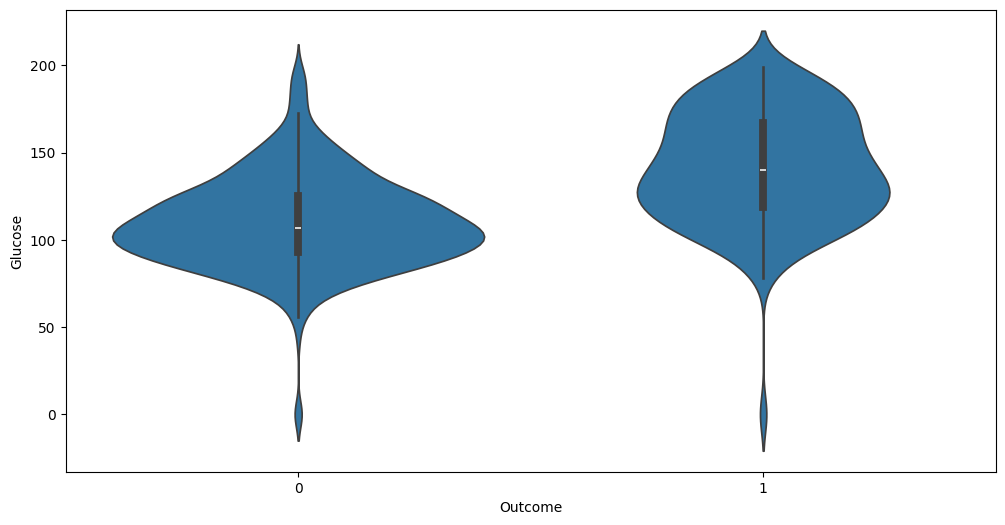

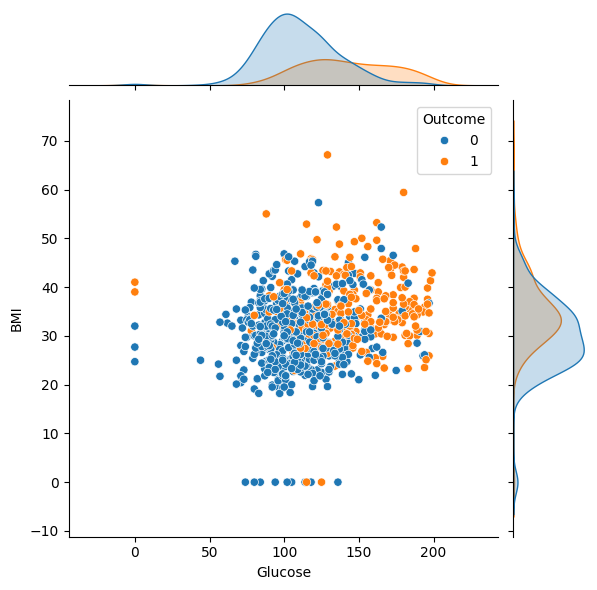

In [13]:
# Violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(x='Outcome', y='Glucose', data=data)
plt.show()

# Joint plot
sns.jointplot(x='Glucose', y='BMI', data=data, kind='scatter', hue='Outcome')
plt.show()

**Interpretation of Violin Plot**

Violin Plot for Glucose by Outcome:

Distribution: The violin plot shows the distribution of glucose levels for each outcome category (0 and 1).
Median and Quartiles: The thick part in the center of each violin represents the interquartile range, and the white dot represents the median glucose level.
Density: The width of the violin represents the density of the data at different glucose levels. Wider sections indicate a higher density of data points.

Interpretation:

Individuals with diabetes (Outcome = 1) generally have higher glucose levels compared to those without diabetes (Outcome = 0).
The distribution of glucose levels is more spread out for individuals with diabetes, indicating higher variability.

**Interpretation of Joint Plot**

Joint Plot for Glucose and BMI by Outcome:

Scatter Plot: The joint plot shows the relationship between glucose and BMI, with different colors indicating the outcome (0 or 1).
Density: The plot may also show density contours or colors to indicate areas with higher concentrations of data points.

Interpretation:

There appears to be a positive correlation between glucose and BMI for both outcomes.
Individuals with higher glucose levels and higher BMI are more likely to have diabetes (Outcome = 1).
The scatter plot allows you to see how these two features interact and how their relationship differs based on the outcome.

**Conclusion**: Features like Glucose, BMI, and Age might be important predictors for diabetes since they show some level of positive correlation with the outcome. Features with very weak or no correlation might not be as useful for predicting the target variable directly but could still contribute in combination with other features. Strong correlations between features (multicollinearity) need to be considered as they can impact the performance and interpretability of predictive models. By analyzing the correlation matrix and heatmap, you can identify which features are more influential in predicting diabetes and explore further relationships in subsequent analysis steps.